In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [275]:
epl = pd.read_csv('./EPL_20_21.csv')

In [276]:
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [277]:
epl.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [278]:
epl.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


Checking for missing data

In [279]:
epl.isna().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

<AxesSubplot:>

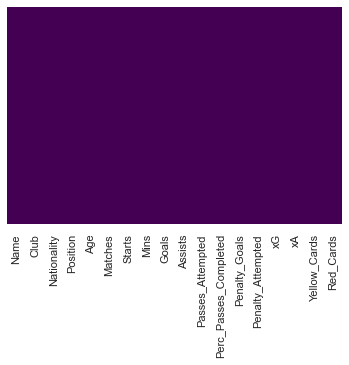

In [280]:
sns.heatmap(epl.isnull(),yticklabels=False,cbar=False,cmap='viridis') 


Adding some extra feature

In [281]:
epl['MinsPerMatch'] = (epl['Mins'] / epl['Matches']).astype(int)
epl['GoalsPerMatch'] = (epl['Goals'] / epl["Matches"]).astype(float)

In [282]:
epl['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

from above, that is obvious some players played 2 different position

In [283]:
epl[epl['Position'] == 'FW,DF']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
18,Callum Hudson-Odoi,Chelsea,ENG,"FW,DF",19,23,10,1059,2,3,659,82.2,0,0,0.12,0.26,0,0,46,0.086957
157,Robert Snodgrass,West Ham United,SCO,"FW,DF",32,3,0,5,0,0,3,100.0,0,0,0.00,0.00,0,0,1,0.000000
184,Bukayo Saka,Arsenal,ENG,"FW,DF",18,32,30,2553,5,3,1155,74.9,0,0,0.24,0.17,1,0,79,0.156250
249,Alex Iwobi,Everton,NGA,"FW,DF",24,30,17,1542,1,2,688,77.0,0,0,0.06,0.11,0,0,51,0.033333
418,Andi Zeqiri,Brighton,SUI,"FW,DF",21,9,0,171,0,0,43,46.5,0,0,0.33,0.04,0,0,19,0.000000
469,Aboubakar Kamara,Fulham,MTN,"FW,DF",25,11,2,315,0,0,128,71.9,0,0,0.11,0.11,1,1,28,0.000000


In [284]:
np.size((epl['Nationality'].unique()))

59

epl's player is from 59 different nationality

<AxesSubplot:xlabel='Nationality'>

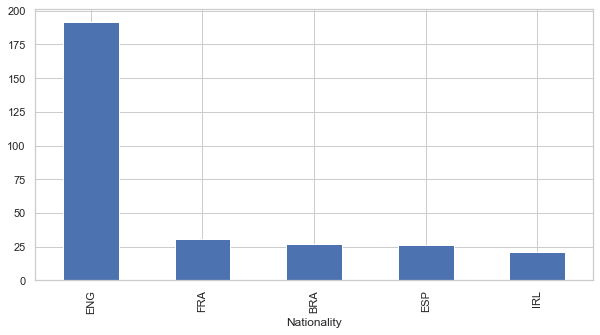

In [285]:
nationality = epl.groupby('Nationality').size().sort_values(ascending = False)
nationality.head().plot(kind='bar',figsize=(10,5))

England have the most player in epl and france,brazil,spain and ireland is in the next stage

<AxesSubplot:>

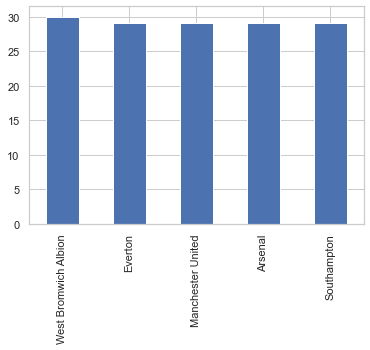

In [286]:
epl['Club'].value_counts().nlargest(5).plot(kind='bar')

Largest squad is for west Bromwich Albion

## Player age analyze

In [287]:
ageUnder20 = epl[epl['Age'] <= 20]
age20_25 = epl[(epl['Age'] > 20) & (epl['Age'] <= 25)]
age25_30 = epl[(epl['Age'] > 25) & (epl['Age'] <= 30)]
ageAbove30 = epl[epl['Age'] > 30 ]

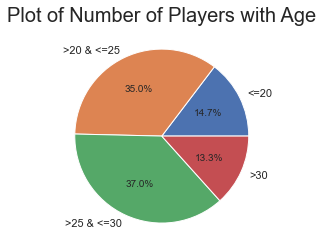

In [288]:
x = np.array([ageUnder20['Name'].count(),age20_25['Name'].count(),age25_30['Name'].count(),ageAbove30['Name'].count()])
mylabels = ["<=20", ">20 & <=25", ">25 & <=30" , ">30"]
plt.title('Plot of Number of Players with Age',fontsize = 20)
plt.pie(x, labels = mylabels, autopct="%.1f%%")
plt.show()

<AxesSubplot:>

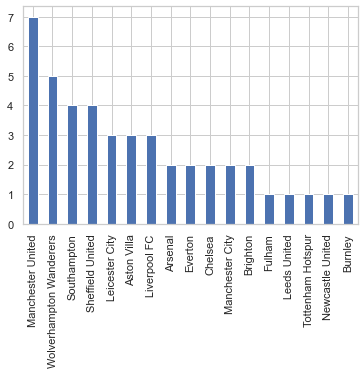

In [289]:
data = epl[epl['Age'] < 20]

data['Club'].value_counts().plot(kind='bar')

As you can see MU has the 7 players under 20

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Chelsea'),
  Text(1, 0, 'Manchester City'),
  Text(2, 0, 'Manchester United'),
  Text(3, 0, 'Liverpool FC'),
  Text(4, 0, 'Leicester City'),
  Text(5, 0, 'West Ham United'),
  Text(6, 0, 'Tottenham Hotspur'),
  Text(7, 0, 'Arsenal'),
  Text(8, 0, 'Leeds United'),
  Text(9, 0, 'Everton'),
  Text(10, 0, 'Aston Villa'),
  Text(11, 0, 'Newcastle United'),
  Text(12, 0, 'Wolverhampton Wanderers'),
  Text(13, 0, 'Crystal Palace'),
  Text(14, 0, 'Southampton'),
  Text(15, 0, 'Brighton'),
  Text(16, 0, 'Burnley'),
  Text(17, 0, 'Fulham'),
  Text(18, 0, 'West Bromwich Albion'),
  Text(19, 0, 'Sheffield United')])

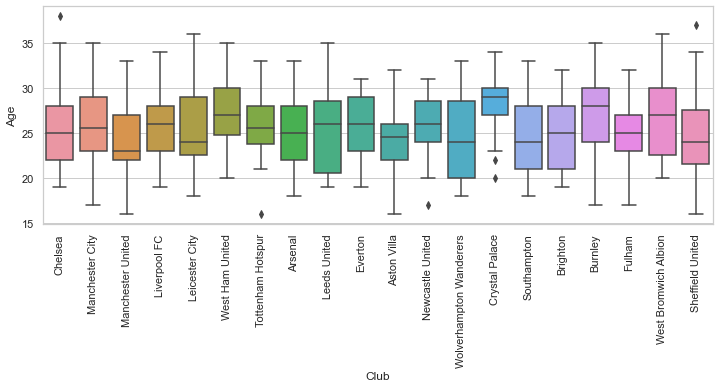

In [290]:
plt.figure(figsize=(12,4))
sns.boxplot(x='Club',y='Age' , data=epl)
plt.xticks(rotation=90)

In [291]:
num_player = epl.groupby('Club').size()
data = (epl.groupby('Club')['Age'].sum()) / num_player
data.sort_values(ascending = False)

Club
Crystal Palace             28.333333
West Ham United            27.500000
Burnley                    27.040000
West Bromwich Albion       26.766667
Newcastle United           26.074074
Manchester City            25.708333
Tottenham Hotspur          25.625000
Chelsea                    25.592593
Leicester City             25.592593
Liverpool FC               25.571429
Everton                    25.413793
Leeds United               25.347826
Fulham                     25.035714
Arsenal                    24.965517
Sheffield United           24.814815
Brighton                   24.555556
Wolverhampton Wanderers    24.444444
Aston Villa                24.291667
Southampton                24.137931
Manchester United          23.862069
dtype: float64

From barplot and above its obvious that crystal palace has the most average player age

In [292]:
epl['Total_Cards'] = epl['Yellow_Cards'] + epl['Red_Cards']

Text(0, 0.5, 'Clubs')

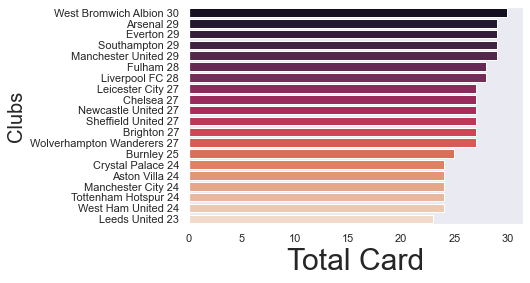

In [293]:
size = epl.groupby('Club',)['Total_Cards'].count().sort_values(ascending= False).tolist() 
label= epl.groupby('Club',)['Total_Cards'].count().sort_values(ascending= False).index.values.tolist()
label = [i+" "+j for i, j in zip(label, [str(x) for x in size])]
sns.set_theme(style="dark")
ax = sns.barplot(x=size,y=label,palette='rocket')
ax.set_xlabel("Total Card",fontsize=30)
ax.set_ylabel("Clubs",fontsize=20)

West Bromwich Albion is the most aggressive team

In [294]:
epl.loc[epl['Position'].str.contains('DF'), 'Position'] = 'DF' 
defenderExcludedPosition = epl[epl['Position'] == 'DF']


In [295]:
mostAggresive = defenderExcludedPosition.sort_values(by = 'Total_Cards',ascending = False).nlargest(n=5,columns='Total_Cards')

In [296]:
mostAggresive

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,...,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch,Total_Cards
53,Harry Maguire,Manchester United,ENG,DF,27,34,34,3047,2,1,...,89.0,0,0,0.06,0.01,11,0,89,0.058824,11
242,Mason Holgate,Everton,ENG,DF,23,28,26,2287,1,0,...,78.8,0,0,0.03,0.03,9,0,81,0.035714,9
272,Matty Cash,Aston Villa,ENG,DF,22,28,28,2372,0,2,...,73.9,0,0,0.01,0.08,8,1,84,0.000000,9
189,Héctor Bellerín,Arsenal,ESP,DF,25,25,24,2089,1,2,...,82.9,0,0,0.04,0.10,8,0,83,0.040000,8
55,Luke Shaw,Manchester United,ENG,DF,25,32,30,2654,1,5,...,81.6,0,0,0.02,0.18,8,0,82,0.031250,8


Top 5 aggressive players is : Maguire,holgate,cash,bellerin,luke shaw

## Assist Analyze

Text(0.5, 1.0, 'Plot of Clubs vs Total Assits ')

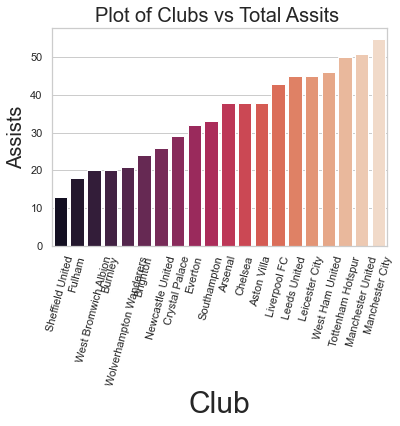

In [297]:
Assits_by_clubs = pd.DataFrame(epl.groupby('Club', as_index=False)['Assists'].sum())
sns.set_theme(style="whitegrid",color_codes=True)
ax = sns.barplot(x='Club',y='Assists',data=Assits_by_clubs.sort_values(by="Assists"),palette='rocket')
ax.set_xlabel("Club",fontsize=30)
ax.set_ylabel("Assists",fontsize=20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total Assits ',fontsize = 20)

Man city leading premiere league assists. 

In [298]:
top_10_assits = epl[['Name','Club','Assists','Matches']].nlargest(n=10,columns='Assists')
top_10_assits

,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36


Harry kane led the EPL in assists.

In [299]:
top_10_assits_per_match = np.float64

epl['AssistPerMatch'] = epl['Assists'] / epl['Matches']
top_10_assits = epl[['Name','Club','AssistPerMatch','Assists','Matches']].nlargest(n=10,columns='AssistPerMatch')
top_10_assits

,Name,Club,AssistPerMatch,Assists,Matches
34,Kevin De Bruyne,Manchester City,0.480000,12,25
162,Harry Kane,Tottenham Hotspur,0.400000,14,35
273,Jack Grealish,Aston Villa,0.384615,10,26
73,Amad Diallo,Manchester United,0.333333,1,3
417,Percy Tau,Brighton,0.333333,1,3
498,Kamil Grosicki,West Bromwich Albion,0.333333,1,3
51,Bruno Fernandes,Manchester United,0.324324,12,37
220,Raphael Dias Belloli,Leeds United,0.300000,9,30
161,Son Heung-min,Tottenham Hotspur,0.270270,10,37
110,Jamie Vardy,Leicester City,0.264706,9,34


In the other hand, de bruyne led the EPL in assist per match

There is some player with very low number of asssits that appear in leading list because of low number of matches, so we can filter the player with much more matches.

In [300]:
top_10_assits_per_match = np.float64
player_with_more_matches = epl[epl['Matches'] > 20]
player_with_more_matches['AssitsPerMatch'] = (player_with_more_matches['Assists'] / player_with_more_matches['Matches']).sort_values()
top_10_assits = player_with_more_matches[['Name','Club','AssistPerMatch','Assists','Matches']].nlargest(n=10,columns='AssistPerMatch')
top_10_assits

c:\users\alireza\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Name,Club,AssistPerMatch,Assists,Matches
34,Kevin De Bruyne,Manchester City,0.480000,12,25
162,Harry Kane,Tottenham Hotspur,0.400000,14,35
273,Jack Grealish,Aston Villa,0.384615,10,26
51,Bruno Fernandes,Manchester United,0.324324,12,37
220,Raphael Dias Belloli,Leeds United,0.300000,9,30
161,Son Heung-min,Tottenham Hotspur,0.270270,10,37
110,Jamie Vardy,Leicester City,0.264706,9,34
54,Marcus Rashford,Manchester United,0.243243,9,37
401,Pascal Groß,Brighton,0.235294,8,34
239,Lucas Digne,Everton,0.233333,7,30


## Goal Analyze

Text(0.5, 1.0, 'Plot of Clubs vs Total Goals ')

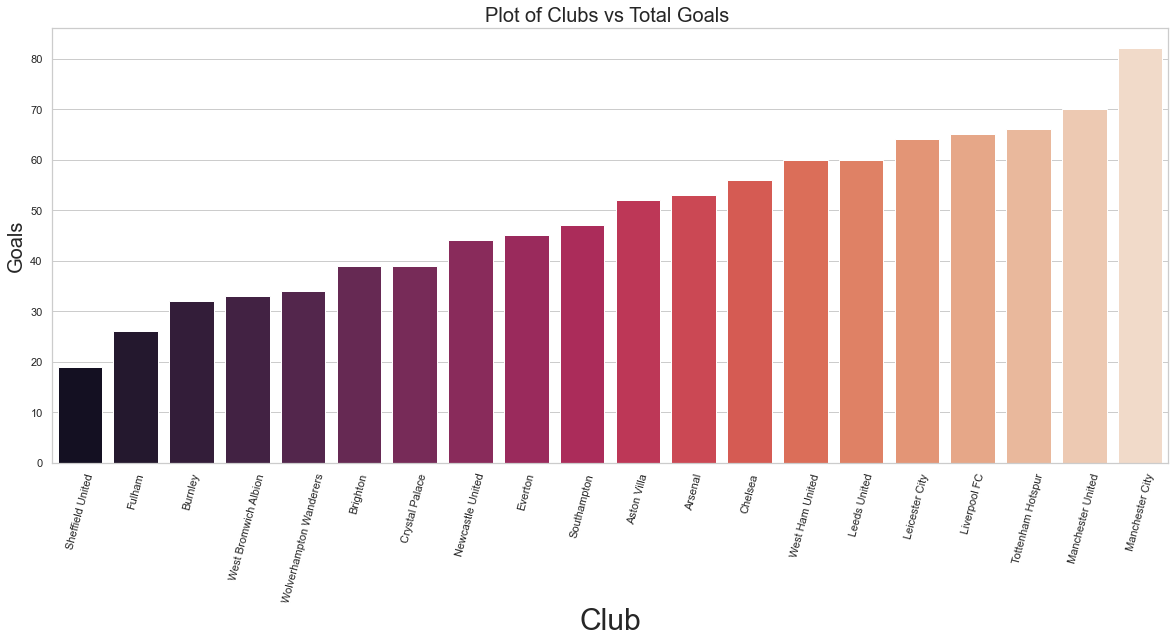

In [301]:
Goals_by_clubs = pd.DataFrame(epl.groupby('Club', as_index=False)['Goals'].sum())
sns.set_theme(style="whitegrid",color_codes=True)
ax = sns.barplot(x='Club',y='Goals',data=Goals_by_clubs.sort_values(by="Goals"),palette='rocket')
ax.set_xlabel("Club",fontsize=30)
ax.set_ylabel("Goals",fontsize=20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"] = (20,8)
plt.title('Plot of Clubs vs Total Goals ',fontsize = 20)

Man city leading premiere league scored goals. 

In [302]:
top_10_goals = epl[['Name','Club','Goals','Matches']].nlargest(n=10,columns='Goals')
top_10_goals

,Name,Club,Goals,Matches
162,Harry Kane,Tottenham Hotspur,23,35
81,Mohamed Salah,Liverpool FC,22,37
51,Bruno Fernandes,Manchester United,18,37
161,Son Heung-min,Tottenham Hotspur,17,37
214,Patrick Bamford,Leeds United,17,38
237,Dominic Calvert-Lewin,Everton,16,33
110,Jamie Vardy,Leicester City,15,34
267,Ollie Watkins,Aston Villa,14,37
33,İlkay Gündoğan,Manchester City,13,28
191,Alexandre Lacazette,Arsenal,13,31


Harry kane led the EPL in goals Scoring.

In [303]:
top_10_goals_per_match = epl[['Name','GoalsPerMatch','Matches','Goals']].nlargest(n=10,columns='GoalsPerMatch')
top_10_goals_per_match

,Name,GoalsPerMatch,Matches,Goals
162,Harry Kane,0.657143,35,23
81,Mohamed Salah,0.594595,37,22
307,Joe Willock,0.571429,14,8
145,Jesse Lingard,0.562500,16,9
175,Gareth Bale,0.550000,20,11
74,Anthony Elanga,0.500000,2,1
51,Bruno Fernandes,0.486486,37,18
237,Dominic Calvert-Lewin,0.484848,33,16
120,Kelechi Iheanacho,0.480000,25,12
92,Diogo Jota,0.473684,19,9


most player have good amount of match number and there is no need to filter player by their match number

In [304]:
player_with_more_matches['GoalsPlusAssists'] = player_with_more_matches['Assists'] + player_with_more_matches['Goals']
player_with_more_matches[['Name','Goals','Assists','GoalsPlusAssists']].sort_values('GoalsPlusAssists',ascending= False).head(10)

c:\users\alireza\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Goals,Assists,GoalsPlusAssists
162,Harry Kane,23,14,37
51,Bruno Fernandes,18,12,30
161,Son Heung-min,17,10,27
81,Mohamed Salah,22,5,27
110,Jamie Vardy,15,9,24
214,Patrick Bamford,17,7,24
54,Marcus Rashford,11,9,20
267,Ollie Watkins,14,5,19
86,Sadio Mané,11,7,18
34,Kevin De Bruyne,6,12,18


hary kane is leading the assists+goals

we can normalize it with match number

In [305]:
player_with_more_matches['GoalsPlusAssistsPerMatch'] = player_with_more_matches['GoalsPlusAssists']/player_with_more_matches['Matches']
player_with_more_matches[['Name','Goals','Assists','Matches','GoalsPlusAssists','GoalsPlusAssistsPerMatch']].nlargest(n=10,columns='GoalsPlusAssistsPerMatch')

c:\users\alireza\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Goals,Assists,Matches,GoalsPlusAssists,GoalsPlusAssistsPerMatch
162,Harry Kane,23,14,35,37,1.057143
51,Bruno Fernandes,18,12,37,30,0.810811
81,Mohamed Salah,22,5,37,27,0.729730
161,Son Heung-min,17,10,37,27,0.729730
34,Kevin De Bruyne,6,12,25,18,0.720000
110,Jamie Vardy,15,9,34,24,0.705882
292,Callum Wilson,12,5,26,17,0.653846
214,Patrick Bamford,17,7,38,24,0.631579
273,Jack Grealish,6,10,26,16,0.615385
143,Michail Antonio,10,5,26,15,0.576923


In [306]:
epl

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,...,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch,Total_Cards,AssistPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,...,1,1,0.21,0.24,2,0,80,0.166667,2,0.138889
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,...,0,0,0.00,0.00,2,0,88,0.000000,2,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,...,0,0,0.41,0.21,2,0,74,0.171429,2,0.228571
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,...,0,0,0.10,0.11,3,0,84,0.111111,3,0.185185
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,...,0,0,0.06,0.12,3,0,74,0.031250,3,0.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Lys Mousset,Sheffield United,FRA,"FW,MF",24,11,2,296,0,0,...,0,0,0.22,0.10,0,0,26,0.000000,0,0.000000
528,Jack O'Connell,Sheffield United,ENG,DF,26,2,2,180,0,0,...,0,0,0.00,0.00,0,0,90,0.000000,0,0.000000
529,Iliman Ndiaye,Sheffield United,FRA,MF,21,1,0,12,0,0,...,0,0,0.00,0.00,0,0,12,0.000000,0,0.000000
530,Antwoine Hackford,Sheffield United,ENG,DF,16,1,0,11,0,0,...,0,0,1.16,0.00,0,0,11,0.000000,0,0.000000
